In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sqlalchemy import create_engine
sys.path.append(os.path.abspath('../scripts'))

In [19]:
from Overview_Analysis import load_data_using_sqlalchemy, calculate_missing_percentage, impute_numerical_columns, drop_columns_with_missing_values

In [20]:
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
    
df.sample(7)

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
19238,1.311448e+19,4/24/2019 9:52,124.0,4/26/2019 8:20,460.0,167263.0,2.082014e+14,3.376364e+10,3.561351e+13,T73329C,...,1759266.0,21884267.0,15749207.0,6191111.0,364806870.0,5117431.0,293104182.0,8139800.0,45093193.0,393528669.0
12086,1.268214e+19,4/24/2019 20:30,340.0,4/24/2019 23:54,942.0,12269.0,2.082010e+14,3.369831e+10,3.548681e+13,8.12221624033158E+016,...,17212406.0,11734570.0,5544084.0,12008913.0,560721541.0,15369932.0,485466596.0,5366916.0,47397920.0,599634006.0
92161,7.349883e+18,4/26/2019 17:28,667.0,4/29/2019 0:53,500.0,199459.0,2.082015e+14,3.366213e+10,3.561481e+13,D36342B,...,3051115.0,8354424.0,20413838.0,17976359.0,216641047.0,6284369.0,193678321.0,9735442.0,46144953.0,244048116.0
30365,7.277826e+18,4/25/2019 4:02,260.0,4/26/2019 4:02,235.0,86399.0,2.082017e+14,3.367052e+10,3.597511e+13,D10012A,...,18436494.0,2315177.0,5682321.0,592585.0,258731212.0,6591056.0,766465411.0,15762150.0,30155574.0,292069528.0
135729,1.311448e+19,4/29/2019 6:20,930.0,4/30/2019 13:09,565.0,110914.0,2.082019e+14,3.367039e+10,3.591861e+13,L72248B,...,3544443.0,18184667.0,18394161.0,12535503.0,754413298.0,6981718.0,220489759.0,3622247.0,45950630.0,782954223.0
87468,6.917538e+18,4/27/2019 16:54,956.0,4/28/2019 0:00,448.0,25564.0,2.082017e+14,3.366106e+10,3.566121e+13,C22364B,...,5035028.0,8544927.0,14909101.0,2609187.0,529390145.0,6500552.0,248186037.0,427825.0,19467280.0,556210449.0
65416,7.349883e+18,4/26/2019 11:35,738.0,4/28/2019 0:40,676.0,133477.0,2.082014e+14,3.366626e+10,3.528141e+13,T52610A,...,4039502.0,10190758.0,11459417.0,19975664.0,108512707.0,13994655.0,516768354.0,11952483.0,58728252.0,138904038.0


In [21]:
calculate_missing_percentage(df)

,Missing Values,Percentage
Bearer Id,991,0.660662
Start,1,0.000667
Start ms,1,0.000667
End,1,0.000667
End ms,1,0.000667
Dur. (ms),1,0.000667
IMSI,570,0.379997
MSISDN/Number,1066,0.710662
IMEI,572,0.381331
Last Location Name,1153,0.768662


In [22]:
df = drop_columns_with_missing_values(df)

Columns dropped: 10


In [23]:
df = impute_numerical_columns(df)
df = df.dropna()

Imputed missing values in the following columns: ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [24]:
# Group by 'MSISDN' and aggregate metrics
df_aggregated = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Session frequency (count of Bearer Ids)
    'Dur. (ms)': 'sum',  # Total session duration in milliseconds
    'Total DL (Bytes)': 'sum',  # Total download traffic in bytes
    'Total UL (Bytes)': 'sum'   # Total upload traffic in bytes
}).reset_index()

# Rename columns for better understanding
df_aggregated.columns = ['MSISDN/Number', 'Session Frequency', 'Total Duration (ms)', 'Total Download (Bytes)', 'Total Upload (Bytes)']


In [25]:
# Top 10 customers by session frequency
top_10_frequency = df_aggregated.nlargest(10, 'Session Frequency')

# Top 10 customers by total duration
top_10_duration = df_aggregated.nlargest(10, 'Total Duration (ms)')

# Top 10 customers by total download traffic
top_10_download = df_aggregated.nlargest(10, 'Total Download (Bytes)')

# Top 10 customers by total upload traffic
top_10_upload = df_aggregated.nlargest(10, 'Total Upload (Bytes)')


In [26]:
print("Top 10 Customers by Session Frequency")
print(top_10_frequency)

print("\n\n\nTop 10 Customers by Total Session Duration")
print(top_10_duration)

print("\n\n\nTop 10 Customers by Total Download Traffic")
print(top_10_download)

print("\n\n\nTop 10 Customers by Total Upload Traffic")
print(top_10_upload)


Top 10 Customers by Session Frequency
       MSISDN/Number  Session Frequency  Total Duration (ms)  \
13451   3.362632e+10                 18            8791927.0   
6394    3.361489e+10                 17            9966898.0   
13107   3.362578e+10                 17           18553754.0   
36867   3.365973e+10                 16            4035428.0   
75999   3.367588e+10                 15            4865947.0   
92486   3.376054e+10                 15            9279434.0   
64825   3.366716e+10                 13            8744914.0   
656     3.360313e+10                 12            6287761.0   
1267    3.360452e+10                 12            5207990.0   
13918   3.362708e+10                 12            4703516.0   

       Total Download (Bytes)  Total Upload (Bytes)  
13451            7.301517e+09           669650721.0  
6394             8.156743e+09           689483001.0  
13107            7.770043e+09           729577380.0  
36867            7.081602e+09           6

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df_aggregated is the dataframe from the previous step

# Select only the columns to normalize (engagement metrics)
metrics = df_aggregated[['Session Frequency', 'Total Duration (ms)', 'Total Download (Bytes)', 'Total Upload (Bytes)']]

# Normalize the data
scaler = StandardScaler()

metrics_normalized = scaler.fit_transform(metrics)
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_aggregated['Cluster'] = kmeans.fit_predict(metrics_normalized)

# Check the distribution of customers in each cluster
print(df_aggregated['Cluster'].value_counts())

# Optionally, display the first few rows of the dataset with the clusters
print(df_aggregated.head())



Cluster
1    78089
0    24561
2     3702
Name: count, dtype: int64
   MSISDN/Number  Session Frequency  Total Duration (ms)  \
0   3.360100e+10                  1             116720.0   
1   3.360100e+10                  1             181230.0   
2   3.360100e+10                  1             134969.0   
3   3.360101e+10                  1              49878.0   
4   3.360101e+10                  2              37104.0   

   Total Download (Bytes)  Total Upload (Bytes)  Cluster  
0            8.426375e+08            36053108.0        1  
1            1.207552e+08            36104459.0        1  
2            5.566597e+08            39306820.0        1  
3            4.019932e+08            20327526.0        1  
4            1.363130e+09            94280527.0        0  


In [28]:
# The cluster centers in the normalized space
cluster_centers = kmeans.cluster_centers_

# Transform back to the original space to interpret the centers
original_centers = scaler.inverse_transform(cluster_centers)

# Display the cluster centers in the original metrics
df_centers = pd.DataFrame(original_centers, columns=['Session Frequency', 'Total Duration (ms)', 'Total Download (Bytes)', 'Total Upload (Bytes)'])
print(df_centers)


   Session Frequency  Total Duration (ms)  Total Download (Bytes)  \
0           2.162907        209576.725896            9.879912e+08   
1           1.010783        103681.567016            4.549580e+08   
2           4.397464        634711.517539            2.067446e+09   

   Total Upload (Bytes)  
0          8.938544e+07  
1          4.133912e+07  
2          1.825950e+08  


In [29]:
# Group by the cluster and compute the min, max, mean, and sum for each metric
cluster_summary = df_aggregated.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Download (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total Upload (Bytes)': ['min', 'max', 'mean', 'sum']
})

# Display the summary statistics
print(cluster_summary)


        Session Frequency                      Total Duration (ms)  \
                      min max      mean    sum                 min   
Cluster                                                              
0                       1   4  2.163063  53127             18235.0   
1                       1   2  1.010821  78934              7142.0   
2                       2  18  4.398974  16285             66594.0   

                                                 Total Download (Bytes)  \
                max           mean           sum                    min   
Cluster                                                                   
0         1573420.0  209662.191849  5.149513e+09             65270746.0   
1         1042254.0  103680.226267  8.096285e+09              8827082.0   
2        18553754.0  634717.944625  2.349726e+09            404647470.0   

                                                  Total Upload (Bytes)  \
                  max          mean           sum     

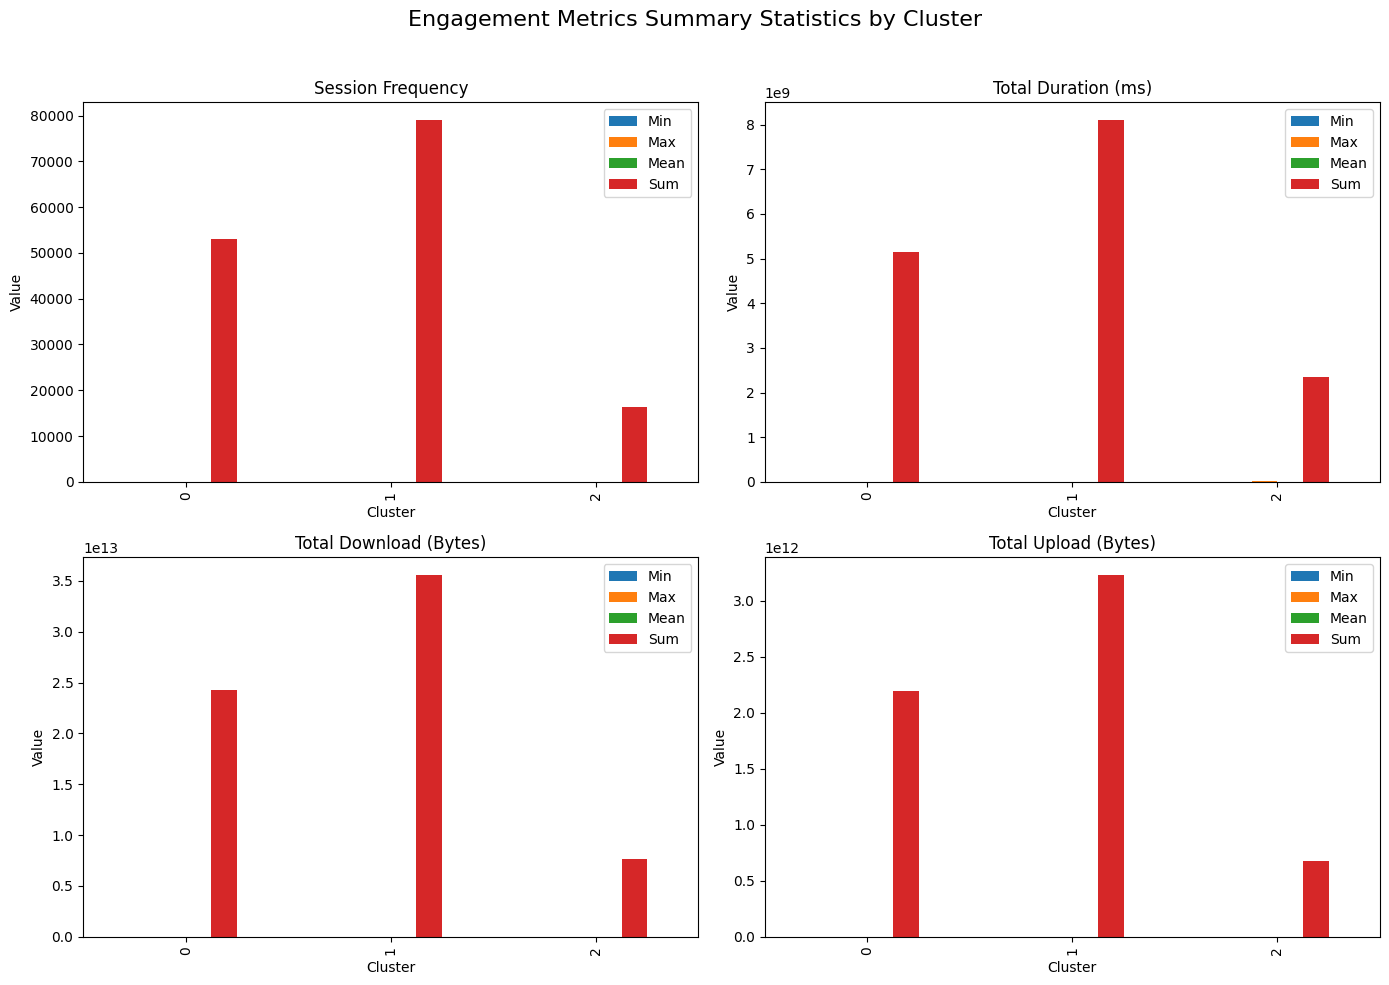

In [30]:
# Step 2: Set up the figure and axes for subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Engagement Metrics Summary Statistics by Cluster', fontsize=16)

# Step 3: Plot each metric in its respective subplot

# Subplot 1: Session Frequency
cluster_summary['Session Frequency'].plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Session Frequency')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_xlabel('Cluster')
axs[0, 0].legend(['Min', 'Max', 'Mean', 'Sum'], loc='upper right')

# Subplot 2: Total Duration (ms)
cluster_summary['Total Duration (ms)'].plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Total Duration (ms)')
axs[0, 1].set_ylabel('Value')
axs[0, 1].set_xlabel('Cluster')
axs[0, 1].legend(['Min', 'Max', 'Mean', 'Sum'], loc='upper right')

# Subplot 3: Total Download (Bytes)
cluster_summary['Total Download (Bytes)'].plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Total Download (Bytes)')
axs[1, 0].set_ylabel('Value')
axs[1, 0].set_xlabel('Cluster')
axs[1, 0].legend(['Min', 'Max', 'Mean', 'Sum'], loc='upper right')

# Subplot 4: Total Upload (Bytes)
cluster_summary['Total Upload (Bytes)'].plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Total Upload (Bytes)')
axs[1, 1].set_ylabel('Value')
axs[1, 1].set_xlabel('Cluster')
axs[1, 1].legend(['Min', 'Max', 'Mean', 'Sum'], loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the main title position
plt.show()

In [31]:

# Sample DataFrame loading
# df = pd.read_csv('your_dataset.csv') # Replace with your actual data loading method

# Step 1: Aggregate total traffic per application (Download + Upload)
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Step 2: Create a list of application columns with the correct names
application_columns = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Google DL (Bytes)', 
    'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 
    'Social Media UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Google UL (Bytes)',
    'Email UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

# Step 3: Aggregate total traffic for each application per user
df_applications = df.groupby('MSISDN/Number')[application_columns].sum()

# Step 4: Derive total traffic per application (Download + Upload)
df_applications['Social Media Traffic'] = df_applications['Social Media DL (Bytes)'] + df_applications['Social Media UL (Bytes)']
df_applications['Youtube Traffic'] = df_applications['Youtube DL (Bytes)'] + df_applications['Youtube UL (Bytes)']
df_applications['Netflix Traffic'] = df_applications['Netflix DL (Bytes)'] + df_applications['Netflix UL (Bytes)']
df_applications['Google Traffic'] = df_applications['Google DL (Bytes)'] + df_applications['Google UL (Bytes)']
df_applications['Email Traffic'] = df_applications['Email DL (Bytes)'] + df_applications['Email UL (Bytes)']
df_applications['Gaming Traffic'] = df_applications['Gaming DL (Bytes)'] + df_applications['Gaming UL (Bytes)']
df_applications['Other Traffic'] = df_applications['Other DL (Bytes)'] + df_applications['Other UL (Bytes)']

# Step 5: Rank users by engagement per application and extract the top 10
top_10_social_media = df_applications[['Social Media Traffic']].sort_values(by='Social Media Traffic', ascending=False).head(10)
top_10_youtube = df_applications[['Youtube Traffic']].sort_values(by='Youtube Traffic', ascending=False).head(10)
top_10_netflix = df_applications[['Netflix Traffic']].sort_values(by='Netflix Traffic', ascending=False).head(10)
top_10_google = df_applications[['Google Traffic']].sort_values(by='Google Traffic', ascending=False).head(10)
top_10_email = df_applications[['Email Traffic']].sort_values(by='Email Traffic', ascending=False).head(10)
top_10_gaming = df_applications[['Gaming Traffic']].sort_values(by='Gaming Traffic', ascending=False).head(10)
top_10_other = df_applications[['Other Traffic']].sort_values(by='Other Traffic', ascending=False).head(10)

# Step 6: Display the top 10 users for each application
print("Top 10 Most Engaged Users by Social Media Traffic:")
print(top_10_social_media)

print("\nTop 10 Most Engaged Users by YouTube Traffic:")
print(top_10_youtube)

print("\nTop 10 Most Engaged Users by Netflix Traffic:")
print(top_10_netflix)

print("\nTop 10 Most Engaged Users by Google Traffic:")
print(top_10_google)

print("\nTop 10 Most Engaged Users by Email Traffic:")
print(top_10_email)

print("\nTop 10 Most Engaged Users by Gaming Traffic:")
print(top_10_gaming)

print("\nTop 10 Most Engaged Users by Other Traffic:")
print(top_10_other)


Top 10 Most Engaged Users by Social Media Traffic:
               Social Media Traffic
MSISDN/Number                      
3.362632e+10             43374779.0
3.376054e+10             39783189.0
3.365973e+10             35412358.0
3.361489e+10             28294544.0
3.362578e+10             27135500.0
3.366716e+10             24247850.0
3.378632e+10             23974919.0
3.366907e+10             23800834.0
3.360313e+10             23077825.0
3.366553e+10             22586033.0

Top 10 Most Engaged Users by YouTube Traffic:
               Youtube Traffic
MSISDN/Number                 
3.362578e+10       452958769.0
3.376054e+10       396289198.0
3.361489e+10       394370218.0
3.362632e+10       374483047.0
3.367588e+10       317410572.0
3.366716e+10       315231310.0
3.362708e+10       308790774.0
3.376041e+10       303169107.0
3.369879e+10       302661958.0
3.360313e+10       284090139.0

Top 10 Most Engaged Users by Netflix Traffic:
               Netflix Traffic
MSISDN/Number       

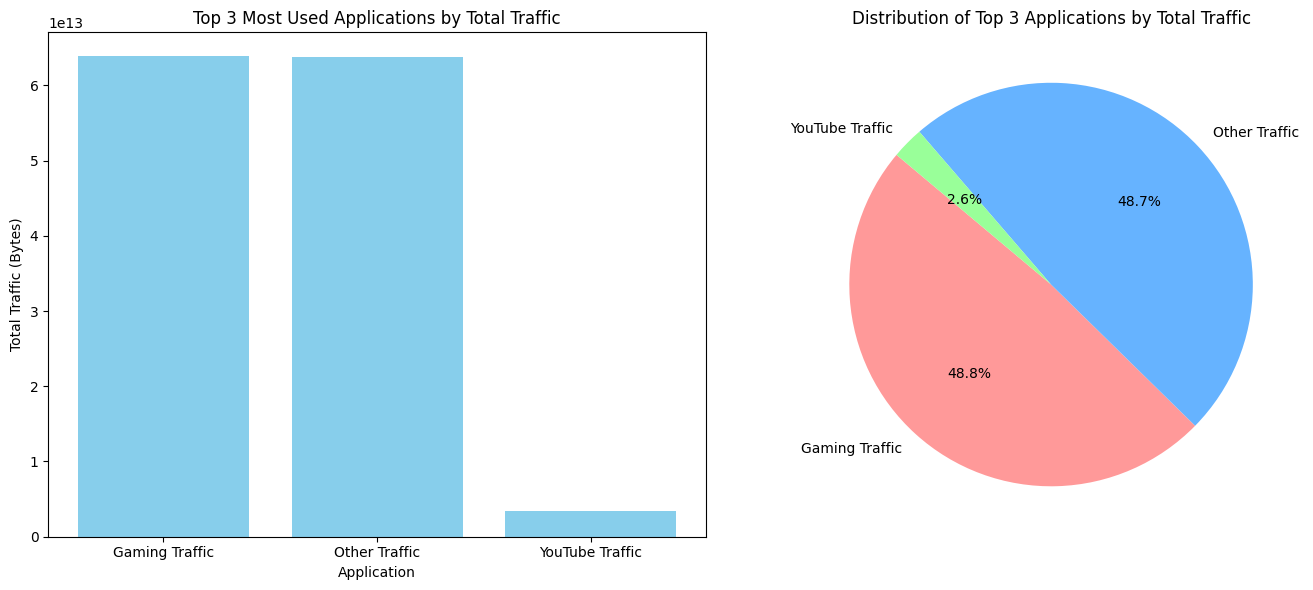

In [32]:

# Assuming 'df' is your DataFrame with the necessary columns
# Aggregate total traffic per application (Download + Upload)
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Create a list of application columns
application_columns = {
    'Social Media Traffic': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'YouTube Traffic': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix Traffic': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Google Traffic': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email Traffic': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'Gaming Traffic': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other Traffic': ['Other DL (Bytes)', 'Other UL (Bytes)']
}

# Compute total traffic for each application
application_traffic = {}
for app_name, cols in application_columns.items():
    application_traffic[app_name] = df[cols].sum().sum()

# Sort the applications by total traffic
sorted_applications = sorted(application_traffic.items(), key=lambda x: x[1], reverse=True)

# Get the top 3 applications
top_3_applications = sorted_applications[:3]

# Extract names and values
top_3_names = [app[0] for app in top_3_applications]
top_3_values = [app[1] for app in top_3_applications]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
axs[0].bar(top_3_names, top_3_values, color='skyblue')
axs[0].set_title('Top 3 Most Used Applications by Total Traffic')
axs[0].set_xlabel('Application')
axs[0].set_ylabel('Total Traffic (Bytes)')

# Pie chart
axs[1].pie(top_3_values, labels=top_3_names, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
axs[1].set_title('Distribution of Top 3 Applications by Total Traffic')

plt.tight_layout()
plt.show()


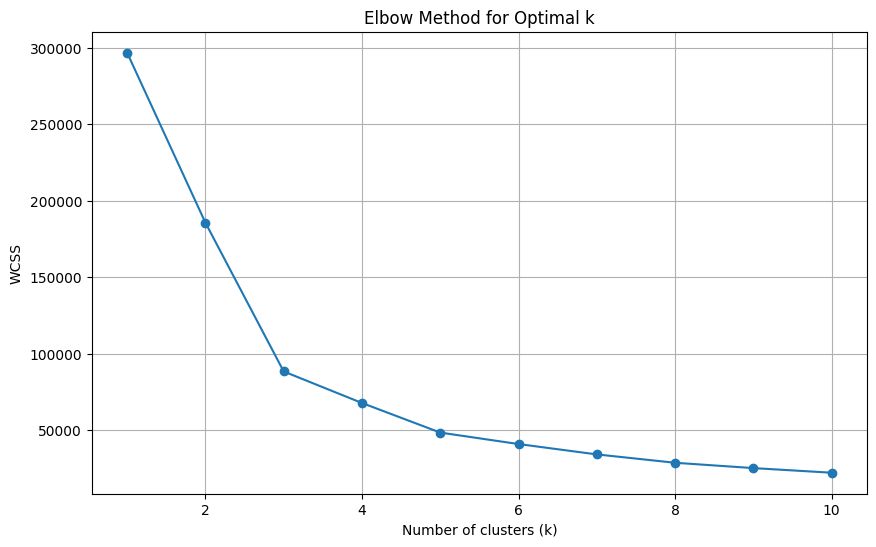

In [33]:
# Assuming df contains the relevant engagement metrics
# Step 1: Normalize the engagement metrics
engagement_metrics = df[['Total Traffic (Bytes)', 'Activity Duration DL (ms)']]
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(engagement_metrics)

# Step 2: Run K-means for a range of k values
wcss = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_metrics)
    wcss.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
